In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('codes_final.xlsx', index_col=[0])

In [4]:
df['project_name'].unique()

array(['Control', 'Cost_Management', 'Service', 'Store', 'Company',
       'Data', 'Jira_Performance_Testing_Tools', 'Portfolio', 'Learn',
       'Lyrasis Dura Cloud', 'Network_Observability',
       'OpenShift_UX_Product_Design', 'Qt_Design_Studio',
       'Red_Hat_Developer_Website_v2', nan], dtype=object)

In [5]:
cols = df.columns[-9:]

In [6]:
cols_low = [col for col in cols if col.startswith('low')]
cols_medium = [col for col in cols if col.startswith('medium')]
cols_high = [col for col in cols if col.startswith('high')]

In [7]:
industry_projects = ['Company', 'Control', 'Data', 'Learn', 'Portfolio', 'Service', 'Store']
oss_projects = ['Cost_Management', 'Jira_Performance_Testing_Tools', 'Lyrasis Dura Cloud', 'Network_Observability', 'OpenShift_UX_Product_Design', 'Qt_Design_Studio', 'Red_Hat_Developer_Website_v2']

# RQ1

In [9]:
def check_labels_rr(row):
    if row['issuetype'] in ['Epic', 'Feature', 'Story', 'User Story', 'Suggestion']:
        if (row[cols_high + cols_medium + cols_low].sum() > 0):
            return 1
        else:
            return 0
    else:
        return -1
    
def check_labels_task(row):
    if row['issuetype'] in ['Task', 'Sub-task', 'Technical task', 'Support-ticket']:
        if (row[cols_high + cols_medium + cols_low].sum() > 0):
            return 1
        else:
            return 0
    else:
        return -1

In [10]:
df['check_labels_rr'] = [check_labels_rr(row) for i, row in df.iterrows()]
df['check_labels_task'] = [check_labels_task(row) for i, row in df.iterrows()]

In [11]:
df_rq1_rr = df[df['check_labels_rr'] != -1]
df_rq1_task = df[df['check_labels_task'] != -1]

In [12]:
RQ1_rr = df_rq1_rr.groupby(['project_name'])['check_labels_rr'].agg(Sum='sum', Count='count')
RQ1_task = df_rq1_task.groupby(['project_name'])['check_labels_task'].agg(Sum='sum', Count='count')
RQ1_rr['perc RR'] = (RQ1_rr['Sum']/RQ1_rr['Count']).round(2)
RQ1_task['perc Task'] = (RQ1_task['Sum']/RQ1_task['Count']).round(2)

In [13]:
RQ1 = RQ1_task.reset_index().merge(RQ1_rr.reset_index(), on = 'project_name', how = 'right')

In [14]:
RQ1.to_excel('RQ1.xlsx')

In [15]:
RQ1.fillna(0)

,project_name,Sum_x,Count_x,perc Task,Sum_y,Count_y,perc RR
0,Company,0.0,0.0,0.00,19,29,0.66
1,Control,3.0,15.0,0.20,65,105,0.62
2,Cost_Management,16.0,57.0,0.28,71,122,0.58
3,Data,16.0,22.0,0.73,35,35,1.00
4,Jira_Performance_Testing_Tools,3.0,20.0,0.15,54,85,0.64
5,Learn,3.0,12.0,0.25,59,131,0.45
6,Lyrasis Dura Cloud,2.0,7.0,0.29,79,105,0.75
7,Network_Observability,0.0,1.0,0.00,42,101,0.42
8,OpenShift_UX_Product_Design,11.0,14.0,0.79,67,116,0.58
9,Portfolio,2.0,9.0,0.22,45,88,0.51


In [16]:
print('For OSS projects:')
print('Mean % requirements in Tasks: {:0.2f}, with std of {:0.2f}\nMean % requirements in requirements items: {:0.2f}, with std of {:0.2f} \n'.format(
    np.mean(RQ1[RQ1['project_name'].isin(oss_projects)]['perc Task']),
    np.std(RQ1[RQ1['project_name'].isin(oss_projects)]['perc Task']),
    np.mean(RQ1[RQ1['project_name'].isin(oss_projects)]['perc RR']), 
    np.std(RQ1[RQ1['project_name'].isin(oss_projects)]['perc RR'])))

For OSS projects:
Mean % requirements in Tasks: 0.30, with std of 0.24
Mean % requirements in requirements items: 0.56, with std of 0.11 



In [17]:
print('For industry projects:')
print('Mean % requirements in Tasks: {:0.2f}, with std of {:0.2f}\nMean % requirements in requirements items: {:0.2f}, with std of {:0.2f} \n'.format(
    np.mean(RQ1[RQ1['project_name'].isin(industry_projects)]['perc Task']),
    np.std(RQ1[RQ1['project_name'].isin(industry_projects)]['perc Task']),
    np.mean(RQ1[RQ1['project_name'].isin(industry_projects)]['perc RR']), 
    np.std(RQ1[RQ1['project_name'].isin(industry_projects)]['perc RR'])))

For industry projects:
Mean % requirements in Tasks: 0.26, with std of 0.23
Mean % requirements in requirements items: 0.66, with std of 0.20 



In [18]:
print('Overall:')
print('Mean % requirements in Tasks: {:0.2f}, with std of {:0.2f}\nMean % requirements in requirements items: {:0.2f}, with std of {:0.2f} \n'.format(
    np.mean(RQ1['perc Task']), np.std(RQ1['perc Task']), np.mean(RQ1['perc RR']), np.std(RQ1['perc RR'])))

Overall:
Mean % requirements in Tasks: 0.28, with std of 0.24
Mean % requirements in requirements items: 0.61, with std of 0.17 



#### Boxplot

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
RQ1_boxplot = RQ1[["perc Task","perc RR"]]
RQ1_boxplot.columns = ['Tasks', 'Requirements-related']

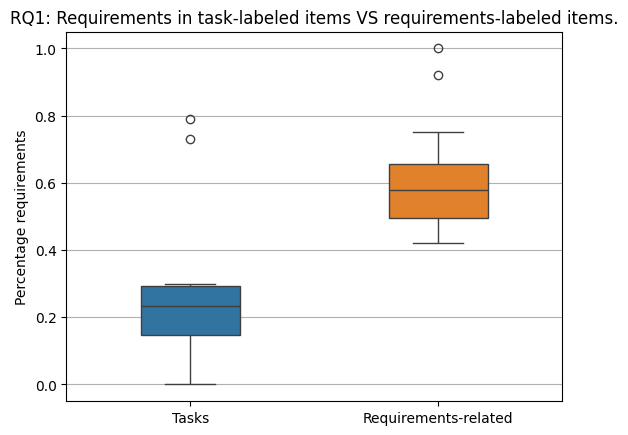

In [21]:
sns.boxplot(data= RQ1_boxplot, width=0.4)
plt.title('RQ1: Requirements in task-labeled items VS requirements-labeled items.')
plt.ylabel('Percentage requirements')
plt.grid(axis='y')
plt.savefig("RQ1.pdf", format="pdf")
plt.show()


#### Hypothesis testing

In [22]:
RQ1['perc Task'].fillna(0)

0     0.00
1     0.20
2     0.28
3     0.73
4     0.15
5     0.25
6     0.29
7     0.00
8     0.79
9     0.22
10    0.30
11    0.00
12    0.14
13    0.00
Name: perc Task, dtype: float64

In [23]:
import scipy.stats as stats

In [30]:
stats.mannwhitneyu(x=RQ1['perc RR'], y=RQ1['perc Task'].fillna(0), alternative = 'greater',method="exact")

MannwhitneyuResult(statistic=173.0, pvalue=0.0001343334180862785)

In [25]:
len(df_rq1_task), len(df_rq1_rr)

(333, 1295)

In [27]:
#(np.mean(RQ1['perc RR']) - np.mean(RQ1['perc Task'].fillna(0))) / (((np.std(RQ1['perc RR'])** 2 + np.std(RQ1['perc Task'].fillna(0)) ** 2) / 2)**(1/2))


1.806797500279233

## RQ2

In [31]:
RQ2 = df.groupby('project_name')[cols].sum() #.reset_index()
RQ2['total req'] = RQ2.sum(axis = 1)

In [32]:
RQ2 = RQ2.reset_index()

In [33]:
#count_items_per_project = df.groupby('project_name').count()['id'].reset_index()

In [34]:
RQ2

,project_name,high_user,high_system,high_nfr,medium_user,medium_system,medium_nfr,low_user,low_system,low_nfr,total req
0,Company,0.0,0.0,0.0,1.0,16.0,2.0,3.0,43.0,3.0,68.0
1,Control,5.0,0.0,3.0,41.0,6.0,16.0,121.0,17.0,15.0,224.0
2,Cost_Management,10.0,4.0,14.0,58.0,38.0,22.0,22.0,56.0,15.0,239.0
3,Data,5.0,0.0,2.0,33.0,0.0,15.0,88.0,0.0,2.0,145.0
4,Jira_Performance_Testing_Tools,2.0,0.0,3.0,37.0,1.0,19.0,7.0,4.0,5.0,78.0
5,Learn,4.0,0.0,2.0,54.0,5.0,5.0,72.0,8.0,7.0,157.0
6,Lyrasis Dura Cloud,0.0,0.0,1.0,36.0,10.0,53.0,1.0,0.0,2.0,103.0
7,Network_Observability,3.0,0.0,0.0,19.0,19.0,16.0,7.0,2.0,0.0,66.0
8,OpenShift_UX_Product_Design,5.0,2.0,7.0,54.0,8.0,55.0,17.0,0.0,11.0,159.0
9,Portfolio,0.0,0.0,0.0,28.0,9.0,9.0,93.0,29.0,7.0,175.0


In [35]:
categories = RQ2.columns[1:-1]

In [36]:
RQ2_perc = pd.DataFrame({row['project_name']:(row[categories]/ row['total req']).to_dict() for i,row in RQ2.iterrows()}).transpose()
    
    #row_perc.to_dict()

In [37]:
RQ2_perc

,high_user,high_system,high_nfr,medium_user,medium_system,medium_nfr,low_user,low_system,low_nfr
Company,0.000000,0.000000,0.000000,0.014706,0.235294,0.029412,0.044118,0.632353,0.044118
Control,0.022321,0.000000,0.013393,0.183036,0.026786,0.071429,0.540179,0.075893,0.066964
Cost_Management,0.041841,0.016736,0.058577,0.242678,0.158996,0.092050,0.092050,0.234310,0.062762
Data,0.034483,0.000000,0.013793,0.227586,0.000000,0.103448,0.606897,0.000000,0.013793
Jira_Performance_Testing_Tools,0.025641,0.000000,0.038462,0.474359,0.012821,0.243590,0.089744,0.051282,0.064103
Learn,0.025478,0.000000,0.012739,0.343949,0.031847,0.031847,0.458599,0.050955,0.044586
Lyrasis Dura Cloud,0.000000,0.000000,0.009709,0.349515,0.097087,0.514563,0.009709,0.000000,0.019417
Network_Observability,0.045455,0.000000,0.000000,0.287879,0.287879,0.242424,0.106061,0.030303,0.000000
OpenShift_UX_Product_Design,0.031447,0.012579,0.044025,0.339623,0.050314,0.345912,0.106918,0.000000,0.069182
Portfolio,0.000000,0.000000,0.000000,0.160000,0.051429,0.051429,0.531429,0.165714,0.040000


In [45]:
RQ2_perc.describe() 

,low_user,low_system,low_nfr,medium_user,medium_system,medium_nfr,high_user,high_system,high_nfr
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.237002,0.112906,0.039315,0.313098,0.078687,0.168610,0.024307,0.005020,0.021055
std,0.228106,0.174224,0.027463,0.199101,0.089191,0.144305,0.018109,0.007650,0.020284
min,0.000000,0.000000,0.000000,0.014706,0.000000,0.029412,0.000000,0.000000,0.000000
25%,0.090320,0.002577,0.015199,0.194173,0.026846,0.073842,0.015418,0.000000,0.002427
50%,0.106489,0.051119,0.044352,0.265561,0.041081,0.097749,0.023900,0.000000,0.013593
75%,0.479515,0.143259,0.063767,0.348123,0.095775,0.243298,0.033724,0.010785,0.036954
max,0.606897,0.632353,0.071429,0.848485,0.287879,0.514563,0.061856,0.020408,0.058577


#### Boxplots

In [39]:
RQ2_perc = RQ2_perc[['low_user', 'low_system', 'low_nfr', 'medium_user', 'medium_system', 'medium_nfr','high_user', 'high_system', 'high_nfr']]

In [40]:
company_df = RQ2_perc.loc[['Company', 'Control', 'Data', 'Learn', 'Portfolio', 'Service', 'Store']]
oss_df = RQ2_perc.loc[['Cost_Management', 'Jira_Performance_Testing_Tools', 'Lyrasis Dura Cloud', 'Network_Observability', 'OpenShift_UX_Product_Design', 'Qt_Design_Studio', 'Red_Hat_Developer_Website_v2']]

In [41]:
from itertools import chain


In [42]:
company_df.columns = ['low user', 'low system', 'low nfr','medium user', 'medium system',
       'medium nfr',  'high user', 'high system', 'high nfr']
oss_df.columns = ['low user', 'low system', 'low nfr','medium user', 'medium system',
       'medium nfr',  'high user', 'high system', 'high nfr']
company_df_raw = company_df.to_dict('index')
oss_df_raw = oss_df.to_dict('index')
company_df_rq2 = pd.DataFrame([{'combination': k_sub, 'project': k, 'perc': v_sub } for k, v in company_df_raw.items() for k_sub, v_sub in v.items() ])
oss_df_rq2 = pd.DataFrame([{'combination': k_sub, 'project': k, 'perc': v_sub } for k, v in oss_df_raw.items() for k_sub, v_sub in v.items() ])

company_df_rq2['project category'] = ['proprietary'] * len(company_df_rq2)
oss_df_rq2['project category'] = ['OSS'] * len(oss_df_rq2)

df_rq2 = pd.concat([oss_df_rq2, company_df_rq2])

df_rq2['granularity'] = df_rq2['combination'].str.split(' ').str[0]
df_rq2['type'] = df_rq2['combination'].str.split(' ').str[1]

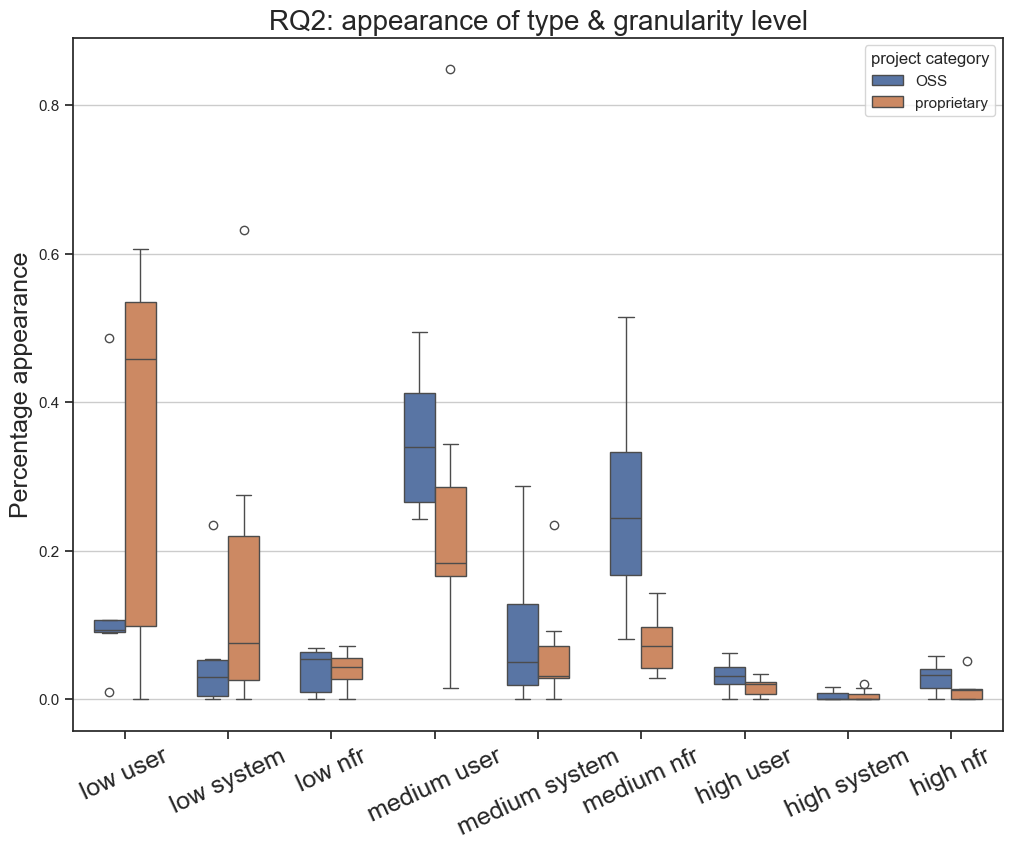

In [43]:
plt.figure(figsize=(12, 9))
sns.set(style="ticks")
g= sns.boxplot(data= df_rq2, x= 'combination', y = 'perc', hue = 'project category', width=0.6)
plt.title('RQ2: appearance of type & granularity level', fontsize=20)
plt.ylabel('Percentage appearance', fontsize=18)
plt.grid(axis='y')
plt.xlabel('', fontsize=18)
plt.setp(g.get_xticklabels(), rotation=25, fontsize=18)
plt.savefig("RQ2-2.pdf", format="pdf", pad_inches = 0.01, bbox_inches = 'tight')
plt.show()

In [44]:
RQ2.to_excel('RQ2.xlsx')

## RQ3

In [66]:
def check_mutliple_label_sum(row):
    present_codes = row[cols] > 0
    if present_codes.sum() > 0:
        return tuple(present_codes[present_codes].index)
    else:
        return ()

In [67]:
cols2 = ['high_nfr', 'medium_nfr', 'low_user',
       'medium_system', 'high_system', 'high_user', 'low_nfr', 'medium_user',
       'low_system']
df['sum multi label'] = df[cols2].sum(axis = 1)
df['multi_label'] = [check_mutliple_label_sum(row) for i, row in df.iterrows()]

In [68]:
cols2 = ['high_nfr', 'medium_nfr', 'low_user',
       'medium_system', 'high_system', 'high_user', 'low_nfr', 'medium_user',
       'low_system']

In [69]:
df['sum multi label'] = df[cols2].sum(axis = 1) #[['file_name', 'multi_label']]

In [70]:
RQ3 = df.groupby(['project_name', 'multi_label']).count()['id'].reset_index()

In [71]:
RQ3['mutliple'] = [1 if len(multi_label) > 1 else 0 for multi_label in RQ3['multi_label']] 

In [78]:
RQ3_0_multiple = RQ3[RQ3['multi_label'].apply(len) > 1].groupby('project_name').sum(['id'])['id'].reset_index()
RQ3_0_multiple.rename(columns = {'id': 'multiple'}, inplace = True)
RQ3_0_single = RQ3[RQ3['multi_label'].apply(len) == 1].groupby('project_name').sum(['id'])['id'].reset_index()
RQ3_0_single.rename(columns = {'id': 'single'}, inplace = True)

In [83]:
RQ3_0 = pd.merge(RQ3_0_multiple,RQ3_0_single, on = 'project_name')
RQ3_0['perc_multiple'] = (RQ3_0['multiple']/ ( RQ3_0['multiple']+ RQ3_0['single'])).round(3)
RQ3_0['perc_single'] = (RQ3_0['single']/ ( RQ3_0['multiple']+ RQ3_0['single'])).round(3)
RQ3_0

,project_name,multiple,single,perc_multiple,perc_single
0,Company,18,1,0.947,0.053
1,Control,43,25,0.632,0.368
2,Cost_Management,47,40,0.540,0.460
3,Data,28,23,0.549,0.451
4,Jira_Performance_Testing_Tools,8,49,0.140,0.860
5,Learn,26,36,0.419,0.581
6,Lyrasis Dura Cloud,19,62,0.235,0.765
7,Network_Observability,12,30,0.286,0.714
8,OpenShift_UX_Product_Design,42,36,0.538,0.462
9,Portfolio,35,12,0.745,0.255


In [86]:
print(np.mean(RQ3_0[RQ3_0['project_name'].isin(industry_projects)]['perc_multiple']),np.std(RQ3_0[RQ3_0['project_name'].isin(industry_projects)]['perc_multiple']))
print(np.mean(RQ3_0[RQ3_0['project_name'].isin(oss_projects)]['perc_multiple']),np.std(RQ3_0[RQ3_0['project_name'].isin(oss_projects)]['perc_multiple']))


0.5557142857142858 0.25947623854092483
0.3338571428571429 0.15706816406664117


In [87]:
print(np.mean(RQ3_0['perc_multiple']), np.std(RQ3_0['perc_multiple']))


0.4447857142857143 0.24146285682168553


In [75]:
RQ3.to_excel('RQ3_0.xlsx')

In [88]:
n = 10
RQ3_1 = df.groupby(['multi_label']).count()['id'].reset_index()
RQ3_1 = RQ3_1[RQ3_1['multi_label'].apply(len) > 1].sort_values('id',ascending=False)
combined_rq3 = RQ3[RQ3['multi_label'].isin(RQ3_1.head(n)['multi_label'].to_list())]

In [89]:
combined_rq3.loc[:,'multi_label'] = combined_rq3['multi_label'].astype('string')

In [90]:
#RQ3[RQ3['multi_label'].isin(RQ3_1.head(8)['multi_label'].to_list())].to_excel('RQ3_2.xlsx')
converted_dict = {}
for row in combined_rq3.to_dict('records'):
    if row['project_name'] not in converted_dict.keys():
        converted_dict[row['project_name']] = {row['multi_label']: row['id']}
    else:
        converted_dict[row['project_name']] = converted_dict[row['project_name']] | {row['multi_label']: row['id']}

In [91]:
#list(np.concatenate([[fname]*n for fname in RQ3['file_name'].unique()]))
combined_rq3_per_project = pd.DataFrame(converted_dict).fillna(0).reset_index() 
combined_rq3_per_project = combined_rq3_per_project.rename(columns = {'index':'multi_label'})

In [92]:
RQ3_1['multi_label'] = RQ3_1['multi_label'].astype('string')

In [95]:
RQ3_1.head(n).merge(combined_rq3_per_project, on = 'multi_label', how = 'left').to_excel('RQ3_1.xlsx')

# RQ4

In [96]:
df = pd.read_excel('categories_per_item2.xlsx')

In [98]:
df['sum'] = df[categories].sum(axis=1)

In [99]:
RQ4 = df[df['sum'] >0].groupby('project_name').agg(['sum', 'count'])['motivation'][['sum', 'count']].reset_index()

In [100]:
RQ4['perc motivation'] = (RQ4['sum']/RQ4['count']).round(3)

In [101]:
RQ4

,project_name,sum,count,perc motivation
0,Company,7,19,0.368
1,Control,6,68,0.088
2,Cost_Management,47,87,0.540
3,Data,27,51,0.529
4,Jira_Performance_Testing_Tools,37,57,0.649
5,Learn,12,62,0.194
6,Lyrasis Dura Cloud,31,81,0.383
7,Network_Observability,10,42,0.238
8,OpenShift_UX_Product_Design,38,78,0.487
9,Portfolio,15,47,0.319


In [63]:
print(np.mean(RQ4[RQ4['project_name'].isin(oss_projects)]['perc motivation']),
np.std(RQ4[RQ4['project_name'].isin(oss_projects)]['perc motivation']))

0.391 0.1624535098332531


In [64]:
print(np.mean(RQ4[RQ4['project_name'].isin(industry_projects)]['perc motivation']),
np.std(RQ4[RQ4['project_name'].isin(industry_projects)]['perc motivation']))

0.3638571428571429 0.16294734344165873


In [65]:
print(np.mean(RQ4['perc motivation']),
np.std(RQ4['perc motivation']))

0.3774285714285715 0.16326565306085586
